# KNN(K Nearest Neighbors, 최근접이웃)

* KNN은 지도학습중에서 `분류 알고리즘`이다.
* 알고리즘의 이름에서 알 수 있듯이 데이터로 부터 `거리가 가까운 k개`를 분류

<img src="./images/31.머신러닝_지도학습_4_KNN_01.png" width="500" height="400">

##### KNN의 장점
1. 알고리즘이 간단하여 구현하기가 쉽다.
1. 수치 기반의 데이터 분류 작업에 성능이 좋다.

##### KNN의 단점
1. 학습데이터의 양이 많으면 분류속도가 느려진다.
1. 차원(벡터)의 크기가 크면 계산량이 많아진다.

* https://kkokkilkon.tistory.com/14
* https://ratsgo.github.io/machine%20learning/2017/04/17/KNN/

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn
from sklearn.model_selection import train_test_split

(26, 2) (26,)


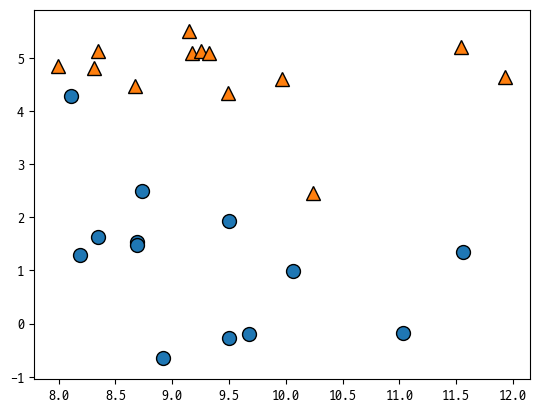

In [4]:
X, y = mglearn.datasets.make_forge()
print(X.shape, y.shape)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

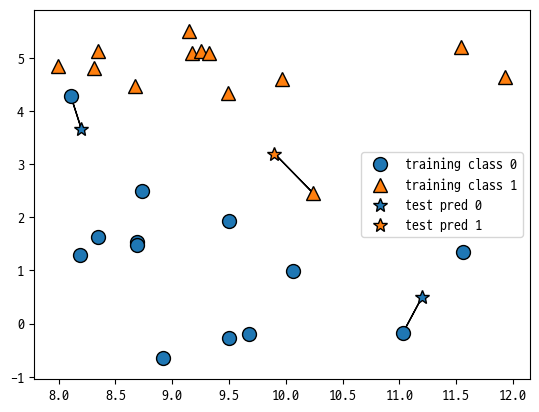

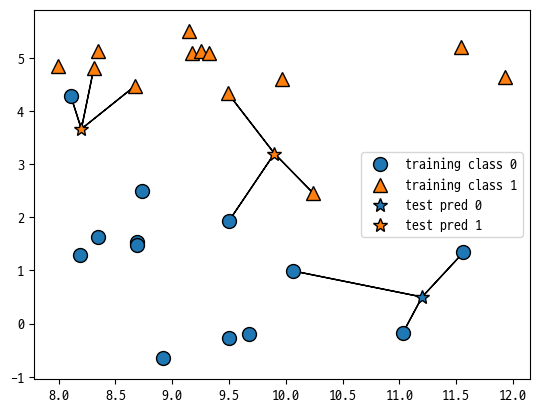

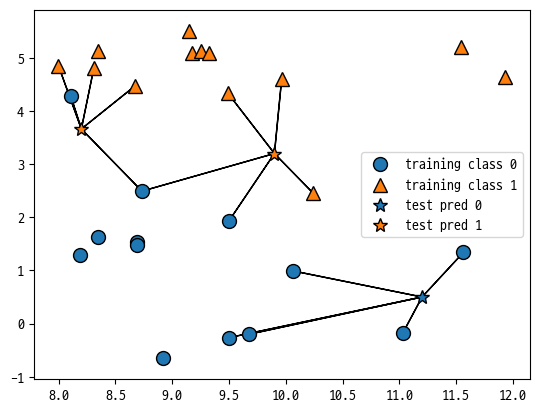

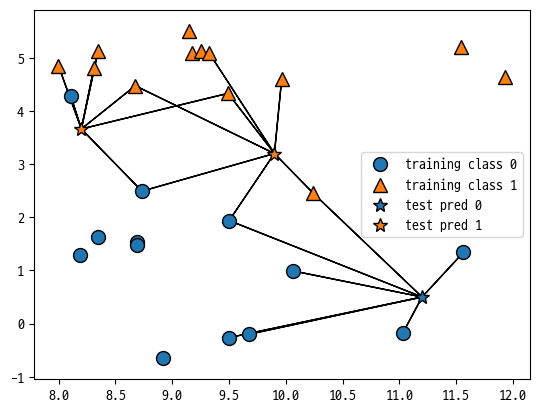

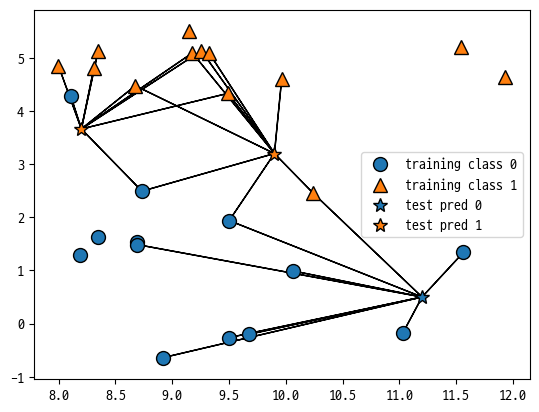

In [6]:
for i in [1,3,5,7,9]:
    mglearn.plots.plot_knn_classification(n_neighbors=i)
    plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

print(f'학습용데이터셋의 점수 = {knn.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 점수 = {knn.score(X_test, y_test):.3f}')
print()

print(f'검증용데이터셋의 예측 = {knn.predict(X_test)}')

학습용데이터셋의 점수 = 0.947
검증용데이터셋의 점수 = 0.857

검증용데이터셋의 예측 = [1 0 1 0 1 0 0]


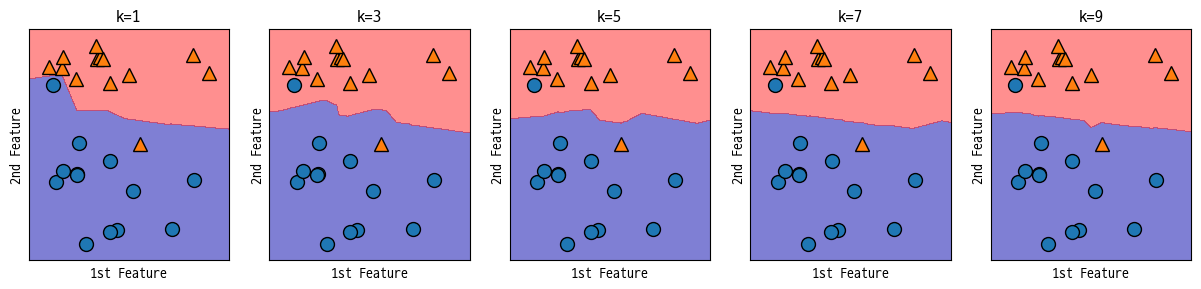

In [29]:
# k값이 [1,3,5,7]
fig, axes = plt.subplots(1,5,figsize=(15,3))

for n, ax in zip([1,3,5,7,9], axes):
    knn =  KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=0.5)

    ax.set_title(f'k={n}')
    ax.set_xlabel('1st Feature')
    ax.set_ylabel('2nd Feature')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# 결과분석
# K갯수를 늘릴수록 결정경계가 좀 더 부드러워진다. 즉, 간단해 진다.
# K갯수를 적게하면 복잡도가 높아지고(과대적합), 많게 하면 낮아진다.

In [11]:
# KNN 지도학습
# 실습1. 유방암 데이터셋 
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [12]:
train_rate = []
test_rate = []

k_values = range(1,101,2)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_rate.append(np.round(knn.score(X_train, y_train), 3))
    test_rate.append(np.round(knn.score(X_test, y_test), 3))
    # print(train_rate, test_rate)
    # break

print(f'학습용 데이터셋의 정확도 = {train_rate}')
print(f'검증용 데이터셋의 정확도 = {test_rate}')

학습용 데이터셋의 정확도 = [1.0, 0.958, 0.946, 0.946, 0.944, 0.939, 0.941, 0.939, 0.937, 0.939, 0.937, 0.934, 0.937, 0.934, 0.93, 0.93, 0.927, 0.93, 0.927, 0.925, 0.927, 0.925, 0.923, 0.925, 0.925, 0.925, 0.918, 0.913, 0.918, 0.913, 0.913, 0.913, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.92, 0.918, 0.915, 0.918, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.913, 0.913]
검증용 데이터셋의 정확도 = [0.916, 0.916, 0.916, 0.923, 0.916, 0.916, 0.909, 0.923, 0.93, 0.93, 0.923, 0.923, 0.923, 0.916, 0.916, 0.916, 0.909, 0.916, 0.916, 0.909, 0.909, 0.909, 0.902, 0.902, 0.895, 0.888, 0.895, 0.895, 0.888, 0.888, 0.895, 0.895, 0.895, 0.888, 0.888, 0.888, 0.895, 0.888, 0.888, 0.888, 0.888, 0.888, 0.888, 0.902, 0.902, 0.895, 0.902, 0.902, 0.902, 0.902]


In [7]:
print(len(train_rate), len(test_rate))

50


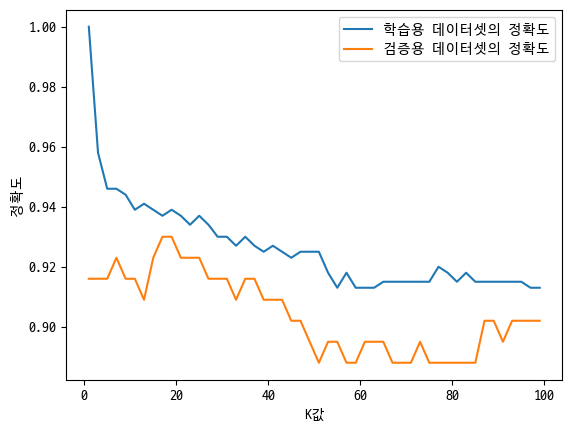

In [13]:
# 시각화
plt.plot(k_values, train_rate, label= '학습용 데이터셋의 정확도')
plt.plot(k_values, test_rate, label= '검증용 데이터셋의 정확도')
plt.legend()
plt.xlabel('K값')
plt.ylabel('정확도')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = \
    train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=7)

knn = KNeighborsClassifier(n_neighbors=60).fit(X_train, y_train)
print(f'학습용 데이터셋의 정확도 = {np.round(knn.score(X_train, y_train), 3)}')
print(f'검증용 데이터셋의 정확도 = {np.round(knn.score(X_test, y_test), 3)}')

학습용 데이터셋의 정확도 = 0.906
검증용 데이터셋의 정확도 = 0.944


In [17]:
# 실습2. iris 데이터셋 
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = \
    train_test_split(iris.data, iris.target, stratify=iris.target, random_state=42)

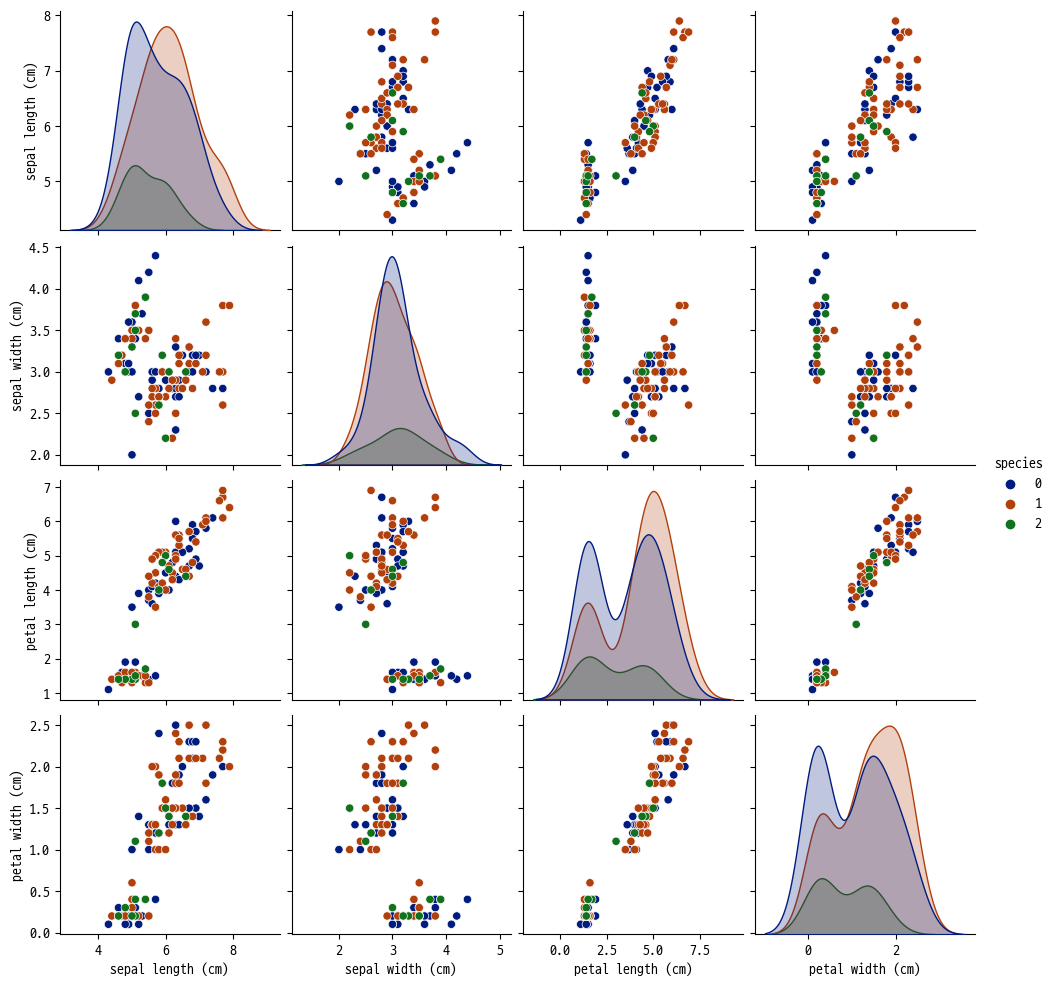

In [25]:
# pair scatter plot
import seaborn as sns

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target)
sns.pairplot(iris_df, diag_kind='auto', hue='species', palette='dark')
# palette :pastel, bright, deep, muted, colorblind, dark
plt.show()

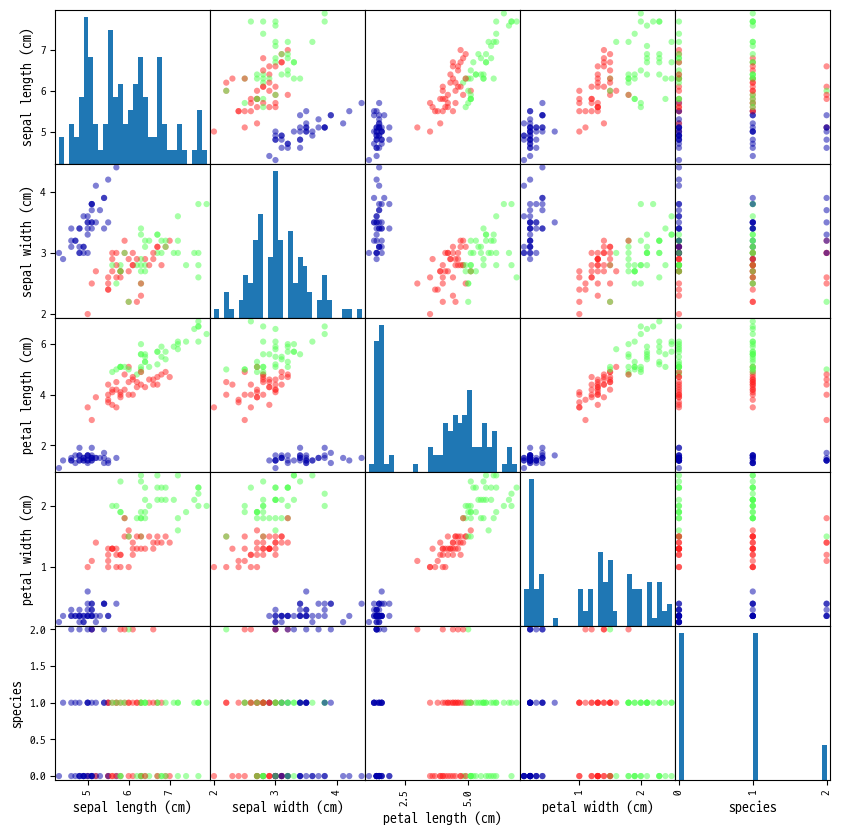

In [31]:
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(10,10), marker='o'
                           , hist_kwds={'bins':30}, s=20, alpha=0.5, cmap=mglearn.cm3)
plt.show()

In [35]:
# iris데이터를 KNN으로 기계학습
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(f'학습용 데이터셋의 정확도 = {np.round(knn.score(X_train, y_train), 3)}')
print(f'검증용 데이터셋의 정확도 = {np.round(knn.score(X_test, y_test), 3)}')

학습용 데이터셋의 정확도 = 0.955
검증용 데이터셋의 정확도 = 0.974


In [46]:
# 임의의 데이터로 학습된 모델로 품종을 예측하기
iris_new = np.array([[5.0,2.0,3.0,0.2]])
prediction = knn.predict(iris_new)
print(type(prediction), prediction)
print(iris.target_names)
print(f'예측한 품종 = {iris.target_names[prediction[0]]}')

<class 'numpy.ndarray'> [1]
['setosa' 'versicolor' 'virginica']
예측한 품종 = versicolor


In [57]:
# 평가
y_pred = knn.predict(X_test)
print(type(y_pred), len(y_pred), y_pred)
print(type(y_train), len(y_test), y_test)

<class 'numpy.ndarray'> 38 [0 1 1 1 0 1 2 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]
<class 'numpy.ndarray'> 38 [0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [59]:
print(f'검증용데이터로 예측한 품종 ={iris.target_names[y_pred]}')
print(f'검증용데이터의 품종 ={iris.target_names[y_test]}')

검증용데이터로 예측한 품종 =['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor']
검증용데이터의 품종 =['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor']


In [63]:
# 예측율
print(f'검증용데이터셋의 예측율(1) = {knn.score(X_test, y_test):.3f}')
print(f'검증용데이터셋의 예측율(2) = {np.mean(y_test == y_pred):.3f}')

검증용데이터셋의 예측율(1) = 0.974
검증용데이터셋의 예측율(2) = 0.974
